In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\asus\Downloads\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()


0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train.shape

(8000, 11)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\asus\anaconda3\New folder (2)\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6833 - loss: 0.6248 - val_accuracy: 0.7969 - val_loss: 0.5147
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7939 - loss: 0.5149 - val_accuracy: 0.7969 - val_loss: 0.5050
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7986 - loss: 0.5019 - val_accuracy: 0.7969 - val_loss: 0.5004
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7970 - loss: 0.5013 - val_accuracy: 0.7969 - val_loss: 0.4981
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7913 - loss: 0.5075 - val_accuracy: 0.7969 - val_loss: 0.4967
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7935 - loss: 0.5032 - val_accuracy: 0.7969 - val_loss: 0.4961
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.5025 - val_accuracy: 0.7969 - val_loss: 0.4957
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7936 - loss: 0.5022 - val_accu

In [33]:
model.layers[0].get_weights()

[array([[-0.0069237 ,  0.31294006,  0.01079348,  0.5531878 ,  0.3090011 ,
          0.190687  ,  0.58570105,  0.02853709,  0.13255171,  0.48063856,
         -0.17172512],
        [-0.02896152, -0.5036312 , -0.29070765,  0.2286037 , -0.14039053,
         -0.27570397, -0.18529151, -0.1654391 , -0.25254688,  0.31916115,
         -0.25721732],
        [ 0.10079627, -0.3397575 , -0.37862363, -0.02961963, -0.45001167,
          0.01029986, -0.26957807,  0.12844306,  0.25343907, -0.08352768,
         -0.29709876],
        [-0.08491957,  0.42862767, -0.45455363,  0.00524038, -0.32237914,
          0.03236741,  0.3353205 ,  0.37672246,  0.3580245 , -0.49126682,
          0.44066316],
        [ 0.04096004, -0.14086306,  0.18273358, -0.24688251,  0.43375686,
         -0.14232606, -0.23030502, -0.2683586 ,  0.16893987, -0.12210984,
          0.365781  ],
        [-0.46463734, -0.20479286, -0.03193   ,  0.03975788,  0.06737772,
         -0.3207519 ,  0.39305028, -0.05063063, -0.23015353, -0.2570544

In [34]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [35]:
y_pred=np.where(y_log>0.5,1,0)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



0.7975

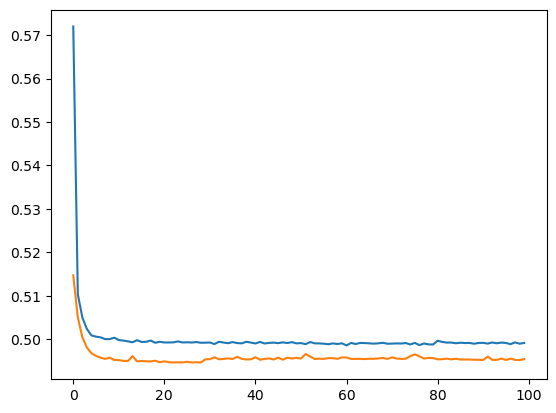

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

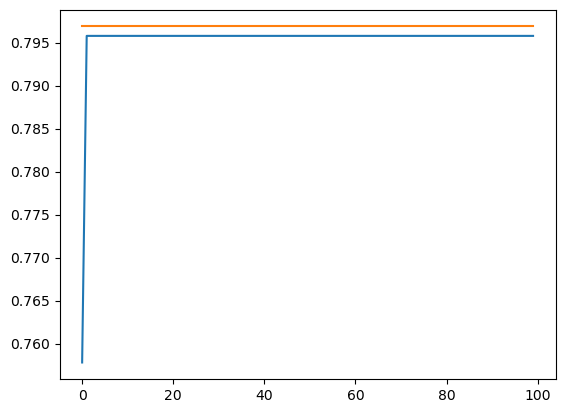

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])